In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)

Planted motifs: 80
Motif indexes: [0, 15, 25, 40, 50, 65, 75, 90, 100, 115, 125, 140, 150, 165, 175, 190, 200, 215, 225, 240, 250, 265, 275, 290, 300, 315, 325, 340, 350, 365, 375, 390, 400, 415, 425, 440, 450, 465, 475, 490, 500, 515, 525, 540, 550, 565, 575, 590, 600, 615, 625, 640, 650, 665, 675, 690, 700, 715, 725, 740, 750, 765, 775, 790, 800, 815, 825, 840, 850, 865, 875, 890, 900, 915, 925, 940, 950, 965, 975, 990]


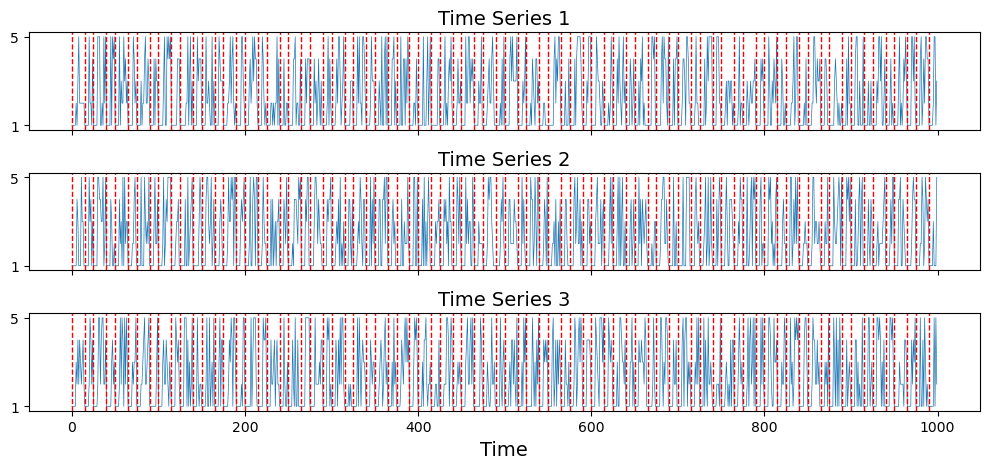

In [9]:
# Parameters
n = 1000  # Length of each time series
k = 3     # Number of time series
motif_pattern = [1, 1, 1, 1, 1]
p = len(motif_pattern)

# Generate k time series of length n
data = np.random.randint(1, 6, (k, n))

# Fixed frequency repetition pattern
motif_indexes_scenario1 = []
index, step = 0, 10  # Starting values for index and step

# Insert the pattern with alternating steps of 10 and 15
while index < n:
    if index + p <= n:  # Ensure the motif pattern fits within bounds
        motif_indexes_scenario1.append(index)
        data[:, index:index + p] = motif_pattern

    # Alternate step values
    step = 15 if step == 10 else 10
    index += step

print(f"Planted motifs: {len(motif_indexes_scenario1)}")
print("Motif indexes:", motif_indexes_scenario1)

# Save data and motif indexes to CSV
output_path = "../data/syntheticdata/"
np.savetxt(f"{output_path}scenario1_n={n}_k={k}.csv", data, delimiter=",")
np.savetxt(f"{output_path}motif_indexes_scenario1_n={n}_k={k}.csv", motif_indexes_scenario1, delimiter=",")

# Plot the multivariate time series data
fig, axes = plt.subplots(nrows=k, ncols=1, figsize=(10, 5), sharex=True)
for i in range(k):
    ax = axes[i]
    ax.plot(data[i], linewidth=0.5)
    ax.set_yticks([1, 5])  # Set y-axis limits for visibility
    ax.set_title(f"Time Series {i+1}", fontsize=14)
    # Highlight planted motifs
    for idx in motif_indexes_scenario1:
        ax.axvline(x=idx, color='r', linestyle='--', linewidth=1)

plt.xlabel("Time", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout for the main title
plt.savefig("../images/data_synthetic_scenario1_n={}_k={}.png".format(n, k))
plt.show()